# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.offline as py
from plotly import tools
import pycountry
py.init_notebook_mode(connected=True)
import folium
from folium import plugins

from PIL import Image

import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = (8, 5)

import warnings
warnings.filterwarnings('ignore')

## 1. Data Processing

##### Steps:
* pandas로 데이터 읽기
* Year 열을 `datetime`로 바꾸기
* Sport 열의 text의 대소문자를 통일하기

In [2]:
df = pd.read_csv("./data/Forbes Richest Atheletes.csv")
print(df.shape)
df.head()

(301, 8)


S.NO               Name Nationality  Current Rank Previous Year Rank  \
0     1         Mike Tyson         USA             1                NaN   
1     2     Buster Douglas         USA             2                NaN   
2     3  Sugar Ray Leonard         USA             3                NaN   
3     4       Ayrton Senna      Brazil             4                NaN   
4     5        Alain Prost      France             5                NaN   

         Sport  Year  earnings ($ million)  
0       boxing  1990                  28.6  
1       boxing  1990                  26.0  
2       boxing  1990                  13.0  
3  auto racing  1990                  10.0  
4  auto racing  1990                   9.0

In [3]:
df.describe()

S.NO  Current Rank         Year  earnings ($ million)
count  301.000000    301.000000   301.000000            301.000000
mean   151.000000      5.448505  2005.122924             45.516279
std     87.035433      2.850995     9.063563             33.525337
min      1.000000      1.000000  1990.000000              8.100000
25%     76.000000      3.000000  1997.000000             24.000000
50%    151.000000      5.000000  2005.000000             39.000000
75%    226.000000      8.000000  2013.000000             59.400000
max    301.000000     10.000000  2020.000000            300.000000

In [4]:
print(*sorted(set(df['Name'])), len(set(df['Name'])), sep=', ')
print(*sorted(set(df['Nationality'])), len(set(df['Nationality'])), sep=', ')
print(*sorted(set(df['Sport'])), len(set(df['Sport'])), sep=', ')

Aaron Rodgers, Aaron Rogers, Alain Prost, Alex Rodriguez, Andre Agassi, Andrew Luck, Arnold Palmer, Ayrton Senna, Buster Douglas, Cam Newton, Canelo Alvarez, Carson Wentz, Cecil Fielder, Conor McGregor, Cristiano Ronaldo, Dale Earnhardt, Dale Earnhardt Jr., David Beckham, Deion Sanders, Dennis Rodman, Donovan "Razor" Ruddock, Drew Brees, Eli Manning, Emmit Smith, Evander Holyfield, Floyd Mayweather, Gary Sheffield, George Foreman, Gerhard Berger, Grant Hill, Greg Norman, Jack Nicklaus, Jacques Villeneuve, James Harden, Jeff Gordon, Jim Courier, Joe Montana, Joe Sakic, Jordan Spieth, Kevin Durant, Kevin Garnett, Kimi Raikkonen, Kirk Cousins, Kobe Bryant, Lance Armstrong, LeBron James, Lennox Lewis, Lewis Hamilton, Lionel Messi, Manny Pacquiao, Matt Ryan, Matthew Stafford, Michael Jordan, Michael Moorer, Michael Schumacher, Michael Vick, Mike Tyson, Monica Seles, Muhammad Ali, Neymar, Nigel Mansell, Novak Djokovic, Oscar De La Hoya, Patrick Ewing, Peyton Manning, Phil Mickelson, Rafael N

In [5]:
df.isnull().sum()

S.NO                     0
Name                     0
Nationality              0
Current Rank             0
Previous Year Rank      24
Sport                    0
Year                     0
earnings ($ million)     0
dtype: int64

In [6]:
# # trim the strings
# # Name =============================================
# Aaron Rogers: mistyping -> Aaron Rodgers
# Donovan "Razor" Ruddock: delete ""
# Shaq O'Neal == Shaquille O'Neal
# # Nationality ======================================
# Filipino == Philippines
# # Sport: format like "AMERICAN_FOOTBALL" or "NBA"
# Auto Racing (Nascar) == NASCAR
# motorcycle gp == WGP

In [7]:
for i, _ in enumerate(df['Name']):
    if df['Name'][i] == 'Aaron Rogers':
        df['Name'][i] = 'Aaron Rodgers'
    elif df['Name'][i] == 'Donovan "Razor" Ruddock':
        df['Name'][i] = 'Donovan Razor Ruddock'
    elif df['Name'][i] == "Shaq O'Neal":
        df['Name'][i] = "Shaquille O'Neal"

for i, _ in enumerate(df['Nationality']):
    if df['Nationality'][i] == 'Filipino':
        df['Nationality'][i] = 'Philippines'
        
for i, _ in enumerate(df['Sport']):
    if df['Sport'][i] == 'Auto Racing (Nascar)':
        df['Sport'][i] = 'NASCAR'
    elif df['Sport'][i] == 'motorcycle gp':
        df['Sport'][i] = 'WGP'
    elif df['Sport'][i] == 'American Football / Baseball':
        df['Sport'][i] = 'American_Football/Baseball'
        
    df['Sport'][i] = '_'.join(i.upper() for i in df['Sport'][i].split(' '))

In [8]:
print(*sorted(set(df['Name'])), len(set(df['Name'])), sep=', ')
print(*sorted(set(df['Nationality'])), len(set(df['Nationality'])), sep=', ')
print(*sorted(set(df['Sport'])), len(set(df['Sport'])), sep=', ')

Aaron Rodgers, Alain Prost, Alex Rodriguez, Andre Agassi, Andrew Luck, Arnold Palmer, Ayrton Senna, Buster Douglas, Cam Newton, Canelo Alvarez, Carson Wentz, Cecil Fielder, Conor McGregor, Cristiano Ronaldo, Dale Earnhardt, Dale Earnhardt Jr., David Beckham, Deion Sanders, Dennis Rodman, Donovan Razor Ruddock, Drew Brees, Eli Manning, Emmit Smith, Evander Holyfield, Floyd Mayweather, Gary Sheffield, George Foreman, Gerhard Berger, Grant Hill, Greg Norman, Jack Nicklaus, Jacques Villeneuve, James Harden, Jeff Gordon, Jim Courier, Joe Montana, Joe Sakic, Jordan Spieth, Kevin Durant, Kevin Garnett, Kimi Raikkonen, Kirk Cousins, Kobe Bryant, Lance Armstrong, LeBron James, Lennox Lewis, Lewis Hamilton, Lionel Messi, Manny Pacquiao, Matt Ryan, Matthew Stafford, Michael Jordan, Michael Moorer, Michael Schumacher, Michael Vick, Mike Tyson, Monica Seles, Muhammad Ali, Neymar, Nigel Mansell, Novak Djokovic, Oscar De La Hoya, Patrick Ewing, Peyton Manning, Phil Mickelson, Rafael Nadal, Riddick Bo

In [9]:
print(len(set(df['Name'])))
print(len(set(df['Nationality'])))
print(len(set(df['Sport'])))

80
21
19


In [10]:
def print_set(column):
    data = sorted(set(list(i for i in df[column])))
    title = f"{column} ({len(data)})"
    a = 20 - len(title)
    if a % 2:
        left = a // 2 - 2
        right = left + 1
    else:
        left = right = a // 2 - 2
    print('\u2554', "\u2550" * (50 + left), f"  {title}  ", "\u2550" * (50 + right), "\u2557", sep='')
    print("\u2551", " " * 4, end='')

    accum = 0
    for d in data:
        print(d, end=', ')
        accum += len(d) + 2
        if accum >= 98:
            print(' ' * (115 - accum), '\u2551', sep='')
            if data.index(d) == len(data) - 1:
                print('\b\b', end='')
                break
            print('\u2551', end=' ' * 5)
            cnt = 0
            accum = 0
    else:
        print('\b\b', ' ' * (117 - accum), '\u2551', sep='')

In [11]:
print_set('Name')
print('\u255A', "\u2550" * 120, "\u255D\n", sep='')
print_set('Nationality')
print('\u255A', "\u2550" * 120, "\u255D\n", sep='')
print_set('Sport')
print('\u255A', "\u2550" * 120, "\u255D\n", sep='')

╔═════════════════════════════════════════════════════  Name (80)  ══════════════════════════════════════════════════════╗
║     Aaron Rodgers, Alain Prost, Alex Rodriguez, Andre Agassi, Andrew Luck, Arnold Palmer, Ayrton Senna,                ║
║     Buster Douglas, Cam Newton, Canelo Alvarez, Carson Wentz, Cecil Fielder, Conor McGregor, Cristiano Ronaldo,        ║
║     Dale Earnhardt, Dale Earnhardt Jr., David Beckham, Deion Sanders, Dennis Rodman, Donovan Razor Ruddock,            ║
║     Drew Brees, Eli Manning, Emmit Smith, Evander Holyfield, Floyd Mayweather, Gary Sheffield, George Foreman,         ║
║     Gerhard Berger, Grant Hill, Greg Norman, Jack Nicklaus, Jacques Villeneuve, James Harden, Jeff Gordon,             ║
║     Jim Courier, Joe Montana, Joe Sakic, Jordan Spieth, Kevin Durant, Kevin Garnett, Kimi Raikkonen, Kirk Cousins,     ║
║     Kobe Bryant, Lance Armstrong, LeBron James, Lennox Lewis, Lewis Hamilton, Lionel Messi, Manny Pacquiao,            ║
║     Matt Ryan,

* S.NO: 인덱스
* Name: 이름
* Nationality: 국적
* Current Rank: 현 연봉 순위
* Previous Year Rank: 작년 연봉 순위
* Sport: 종목 이름
* Year: "현"에 해당하는 년도
* earnings (\\$ million): 연봉 (10만\\$)

In [12]:
# Creating a copy of the original dataframe- df
df1 = df.copy()
df1.drop('S.NO',axis=1,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  301 non-null    object 
 1   Nationality           301 non-null    object 
 2   Current Rank          301 non-null    int64  
 3   Previous Year Rank    277 non-null    object 
 4   Sport                 301 non-null    object 
 5   Year                  301 non-null    int64  
 6   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 16.6+ KB


In [13]:
# Convert string to datetime64
df1['Year'] = df1['Year'].apply(pd.to_datetime,format='%Y')

# Set Date column as the index column.
df1['year'] = pd.DatetimeIndex(df1['Year']).year  
df1.set_index('year', inplace=True)
df1.drop('Year',axis=1,inplace=True)

# # Converting the sport column to uppercase
# df1['Sport'] = df1['Sport'].str.upper()
# df1.head()

In [14]:
df1.head()

Name Nationality  Current Rank Previous Year Rank  \
year                                                                   
1990         Mike Tyson         USA             1                NaN   
1990     Buster Douglas         USA             2                NaN   
1990  Sugar Ray Leonard         USA             3                NaN   
1990       Ayrton Senna      Brazil             4                NaN   
1990        Alain Prost      France             5                NaN   

            Sport  earnings ($ million)  
year                                     
1990       BOXING                  28.6  
1990       BOXING                  26.0  
1990       BOXING                  13.0  
1990  AUTO_RACING                  10.0  
1990  AUTO_RACING                   9.0

## 2. World's Highest-Paid Athletes in 2020

In [15]:
data_2020 = df1[df1.index == 2020]

trace = go.Bar(
                    x = data_2020["earnings ($ million)"],
                    y = data_2020['Name'] ,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title="World's Highest-Paid Athletes in 2020",width=800, height=500, 
                       #xaxis= dict(title='No of times ranked higest'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

## 3. Analysis of Highest paid Athlete each year from 1990 to 2020

In [16]:
# Top Paid Athlete for Each Year
Top_paid_each_year = df1[df1['Current Rank'] == 1].sort_values(by='year',ascending=False)

z = Top_paid_each_year[['Name','Sport','Nationality','earnings ($ million)']]

z.style.background_gradient(cmap='Reds')

### Athlete earning the most, maximum number of times

In [17]:
counts_top = Top_paid_each_year['Name'].value_counts().to_frame()


trace = go.Bar(
    y=counts_top.index,
    x=counts_top['Name'],
    orientation='h',
    marker=dict(color='pink', line=dict(color='black',width=1)),
)
data = [trace]
layout = go.Layout(
    barmode="group",title='Athlete earning the most,maximum number of times',width=800, height=500, 
    xaxis=dict(title='No of times ranked higest'),
    yaxis=dict(autorange="reversed", ),
    showlegend=False,
    # margin={'autoexpand': True}
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [18]:
total_earnings = Top_paid_each_year.groupby('Name')['earnings ($ million)'].sum().to_frame().reset_index()
top_ranks = Top_paid_each_year['Name'].value_counts().to_frame().reset_index()
top_ranks.rename(columns={'index':'Name',
                          'Name':'Rank_counts'}, inplace=True)
df_compare = total_earnings.merge(top_ranks, on='Name')

In [19]:
df_compare['earn'] = df_compare['earnings ($ million)']
del df_compare['earnings ($ million)']
df_compare

Name  Rank_counts   earn
0   Cristiano Ronaldo            2  181.0
1   Evander Holyfield            1   60.5
2    Floyd Mayweather            4  775.0
3        Lionel Messi            1  127.0
4      Michael Jordan            6  293.1
5  Michael Schumacher            2  108.0
6          Mike Tyson            2  103.6
7       Roger Federer            1  106.3
8         Tiger Woods           11  987.4

In [20]:
trace0 = go.Bar(
                y=df_compare['Name'],
                x=df_compare['Rank_counts'],
                marker=dict(color='rgba(171, 50, 96, 0.6)',line=dict(color='rgba(171, 50, 96, 1.0)',width=1)),
                name='Top Ranks',
                orientation='h',
)

trace1 = go.Scatter(
                y=df_compare['Name'],
                x=df_compare['earn'],
                mode='lines+markers',
                line=dict(color='rgb(63, 72, 204)'),
                name='income',
)

layout = dict(
                title='Income and Top Ranks',
                yaxis=dict(showticklabels=True,domain=[0, 0.85]),
                yaxis2=dict(showline=True,showticklabels=False,linecolor='rgba(102, 102, 102, 0.8)',linewidth=2,domain=[0, 0.85]),
                xaxis=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0, 0.42]),
                xaxis2=dict(zeroline=False,showline=False,showticklabels=False,showgrid=True,domain=[0.47, 1],side='top',dtick=25),
                legend=dict(x=0.029,y=1.038,font=dict(size=10) ),
                margin=dict(l=200, r=20,t=70,b=70),
                paper_bgcolor='rgb(248, 248, 255)',
                plot_bgcolor='rgb(248, 248, 255)',
)

annotations = []
y_s = df_compare['Rank_counts']
y_nw = np.rint(df_compare['earn'])
# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, df_compare['Name']):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2', y=xd, x=ydn-1,text='{:,}'.format(ydn),font=dict(family='Arial', size=12,color='rgb(63, 72, 204)'),showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1', y=xd, x=yd+1,text=str(yd),font=dict(family='Arial', size=12,color='rgb(171, 50, 96)'),showarrow=False))

layout['annotations'] = annotations


# Creating two subplots
# fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
#                           shared_yaxes=False, vertical_spacing=0.001)
# fig.append_trace(trace0, 1, 1)
# fig.append_trace(trace1, 1, 2)
fig = go.Figure()
fig.add_trace(trace0)
fig.add_trace(trace1)

fig['layout'].update(layout)
fig.show()

In [21]:
# earnings ($ million) Rank_counts

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

tds = df_compare.set_index('Name')
tds[['earn', 'Rank_counts']].iplot(
    mode='lines+markers', y='earn', secondary_y='Rank_counts',
    yTitle='Income', secondary_y_title='Top counts', text=None,
    title='Income and Top Ranks',legend='topleft')

### Country which prouces the maximum earners in Sports

In [22]:
counts_top = Top_paid_each_year['Nationality'].value_counts().to_frame()


trace = go.Bar(
                    x = counts_top.index,
                    y = counts_top['Nationality'] ,
                    orientation='v',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Country which produces the maximum earners in Sports',width=800, height=500, 
                       xaxis= dict(title='No of times ranked higest'),
                       #yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

### Except USA

In [23]:
counts_top = Top_paid_each_year['Nationality'].value_counts().to_frame()
counts_top = counts_top.drop(['USA'])

trace = go.Bar(
                    x = counts_top.index,
                    y = counts_top['Nationality'] ,
                    orientation='v',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Country which produces the maximum earners in Sports',width=800, height=500, 
                       xaxis= dict(title='No of times ranked higest'),
                       #yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

### How much the Top Paid Athlete for Each Year, earn?

In [24]:
trace = go.Scatter(
                    x = Top_paid_each_year.index,
                    y = Top_paid_each_year['earnings ($ million)'] ,
                    orientation='v',
                    marker = dict(color='red',
                                 line=dict(color='royalblue',width=2)),
                    )
data = [trace]
layout = go.Layout(title='How much did the Top Paid Athlete for Each Year, earn? ',width=800, height=500, 
                       xaxis= dict(title='Years'),
                       yaxis=dict(title="Earning in US Dollars(million)"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

## 4. Anaylsis of the Top Ten Highest paid Athletes each year from 1990 to 2010

### Sport which dominates in earnings

In [25]:
df['Sport'] = df['Sport'].str.upper() # Converting the text to uppercase
max_sport = df['Sport'].value_counts().to_frame()

trace = go.Bar(
                    y = max_sport.index,
                    x = max_sport['Sport'] ,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Sport which dominates in earnings',width=800, height=500, 
                       xaxis= dict(title='No of times ranked highest'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

### Country which dominates in Sports earnings

In [26]:
max_sport = df['Nationality'].value_counts().to_frame()


trace = go.Bar(
                    y = max_sport.index,
                    x = max_sport['Nationality'] ,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Country which dominates in Sports earningss',width=800, height=500, 
                       xaxis= dict(title='No of times ranked highest'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

### Except USA

In [27]:
max_sport = df['Nationality'].value_counts().to_frame()
max_sport = max_sport.drop(['USA'])

trace = go.Bar(
                    y = max_sport.index,
                    x = max_sport['Nationality'] ,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Country which dominates in Sports earningss',width=800, height=500, 
                       xaxis= dict(title='No of times ranked highest'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

### Athletes appearing maximum time on the list

In [28]:
s = df['Name'].value_counts().to_frame()[:5]
s.style.background_gradient(cmap='Reds')  

## 5. Analysis Top three earning players of all time

In [29]:
top_earners_alltime = pd.pivot_table(df, index='Name',values="earnings ($ million)", aggfunc='sum')
top3_earners_all = top_earners_alltime.sort_values(by="earnings ($ million)",ascending=False)[:3]

top3_earners_all.style.background_gradient(cmap='Reds') 

### Analyzing Tiger Woods earnings over the years

In [30]:
def earnings_plot(dataframe,athlete,image_path,opacity):
    """
    function that creates a plotly line chart with image of the athlete in the background
    
    
    """
    athlete_df = df1[df1['Name'] == athlete]

    trace = go.Scatter(
                    x = athlete_df.index,
                    y = athlete_df['earnings ($ million)'] ,
                    orientation='v',
                    marker = dict(color='red',
                                 line=dict(color='red',width=6)),
                    )
    data = [trace]
    layout= go.Layout(title= f'{athlete}' +"'s earnings over the Years",
                  xaxis=dict(title='Year'),
                  yaxis=dict(title="Earnings in US$ (millions)"),
                  images= [dict(
                          source=Image.open(image_path),
                          xref= "paper",
                          yref= "paper",
                          x= 0.5,
                          y= 0.5,
                          sizex= 1,
                          sizey= 1,
                          sizing= "stretch",
                          opacity= opacity,
                          xanchor= "center", 
                          yanchor="middle",
                          layer= "below")])
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)

[image src](https://www.golfdigest.com/gallery/tiger-woods-best-pictures)  
[Wikipedia](https://en.wikipedia.org/wiki/Tiger_Woods)


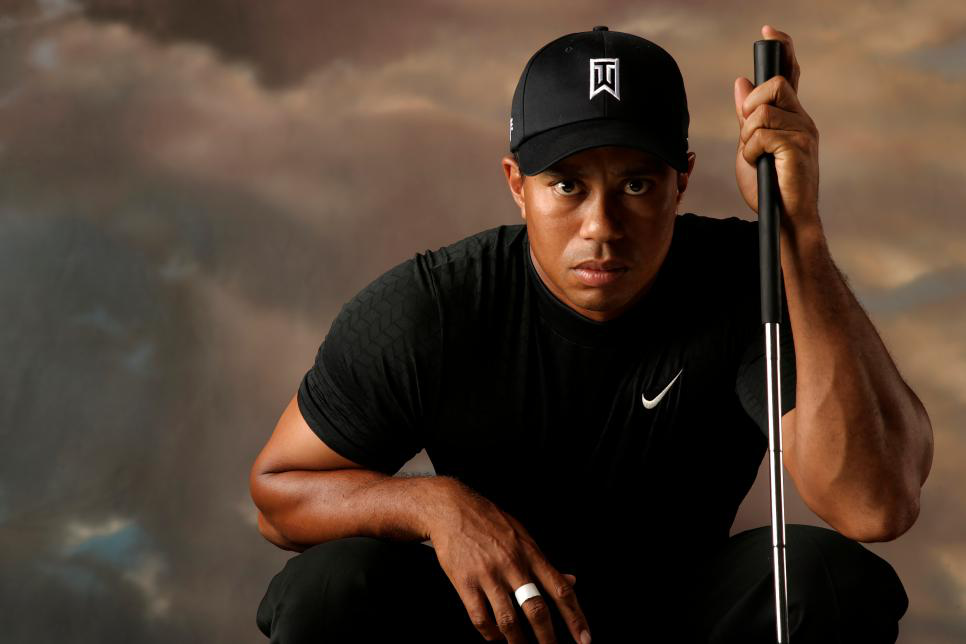

In [31]:
image_path = "./data/TigerWoods.jpeg"
earnings_plot(df1,'Tiger Woods',image_path,opacity=0.3)

### Analyzing Floyd Mayweather earnings over the years

[image src](https://www.sportingnews.com/us/motorsports/news/floyd-mayweather-nascar-money-team-racing/1dxoqtb9dxgpf14wplpj97h7kk)  
[Wikipedia](https://en.wikipedia.org/wiki/Floyd_Mayweather_Jr.)


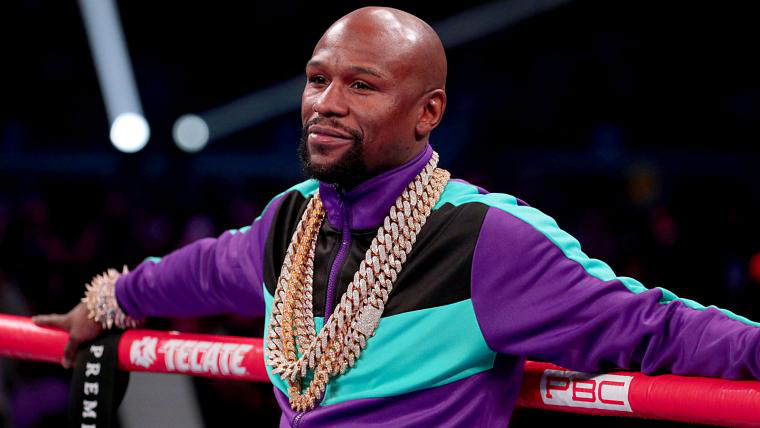

In [32]:
image_path = "./data/FloydMayweatherJr.jpg"
earnings_plot(df1,'Floyd Mayweather',image_path,opacity=0.2)

### Analyzing LeBron James earnings over the years

[image src](https://commons.wikimedia.org/wiki/File:LeBron_James_(15662939969).jpg)  
[Wikipedia](https://en.wikipedia.org/wiki/LeBron_James)


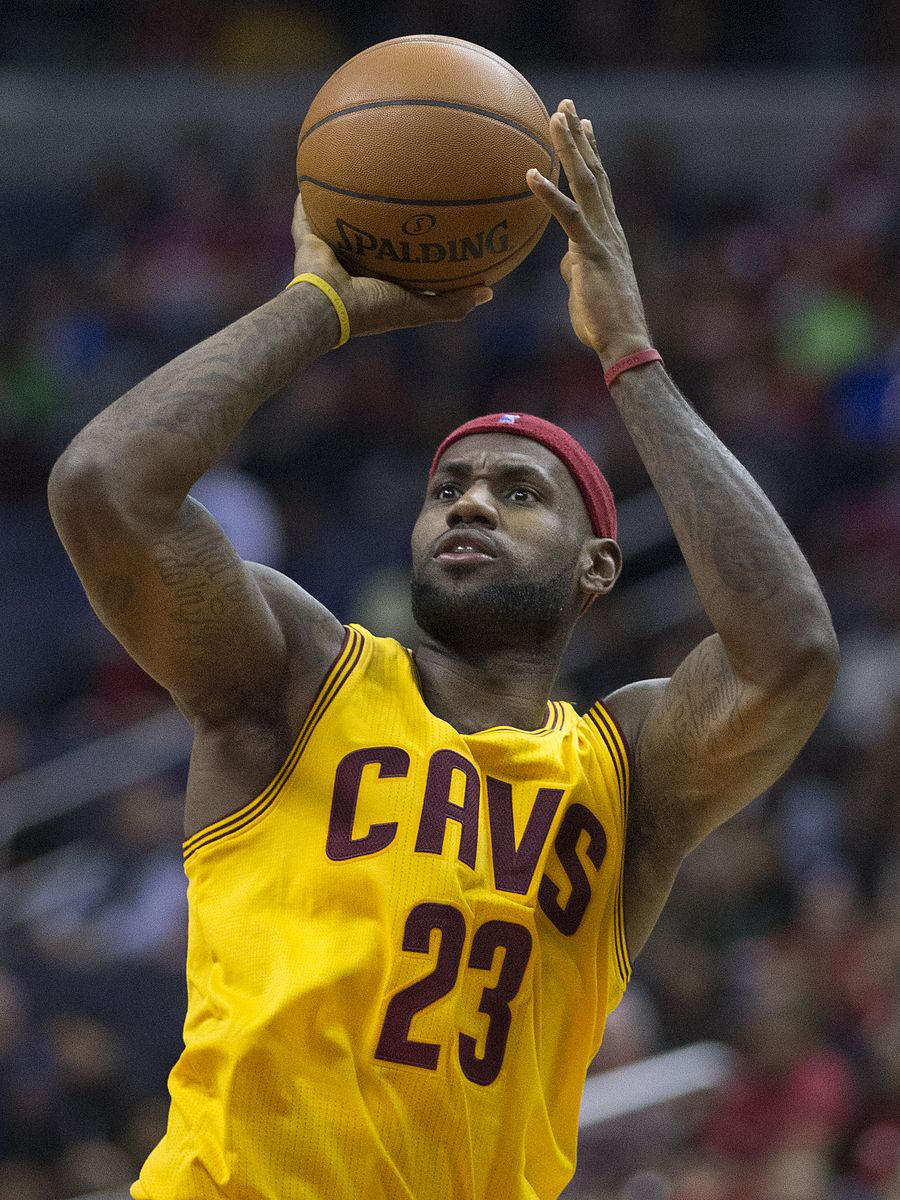

In [33]:
image_path = "./data/LeBronJames.jpg"
earnings_plot(df1,'LeBron James',image_path,opacity=0.2)

## 7. Racing Bar chart

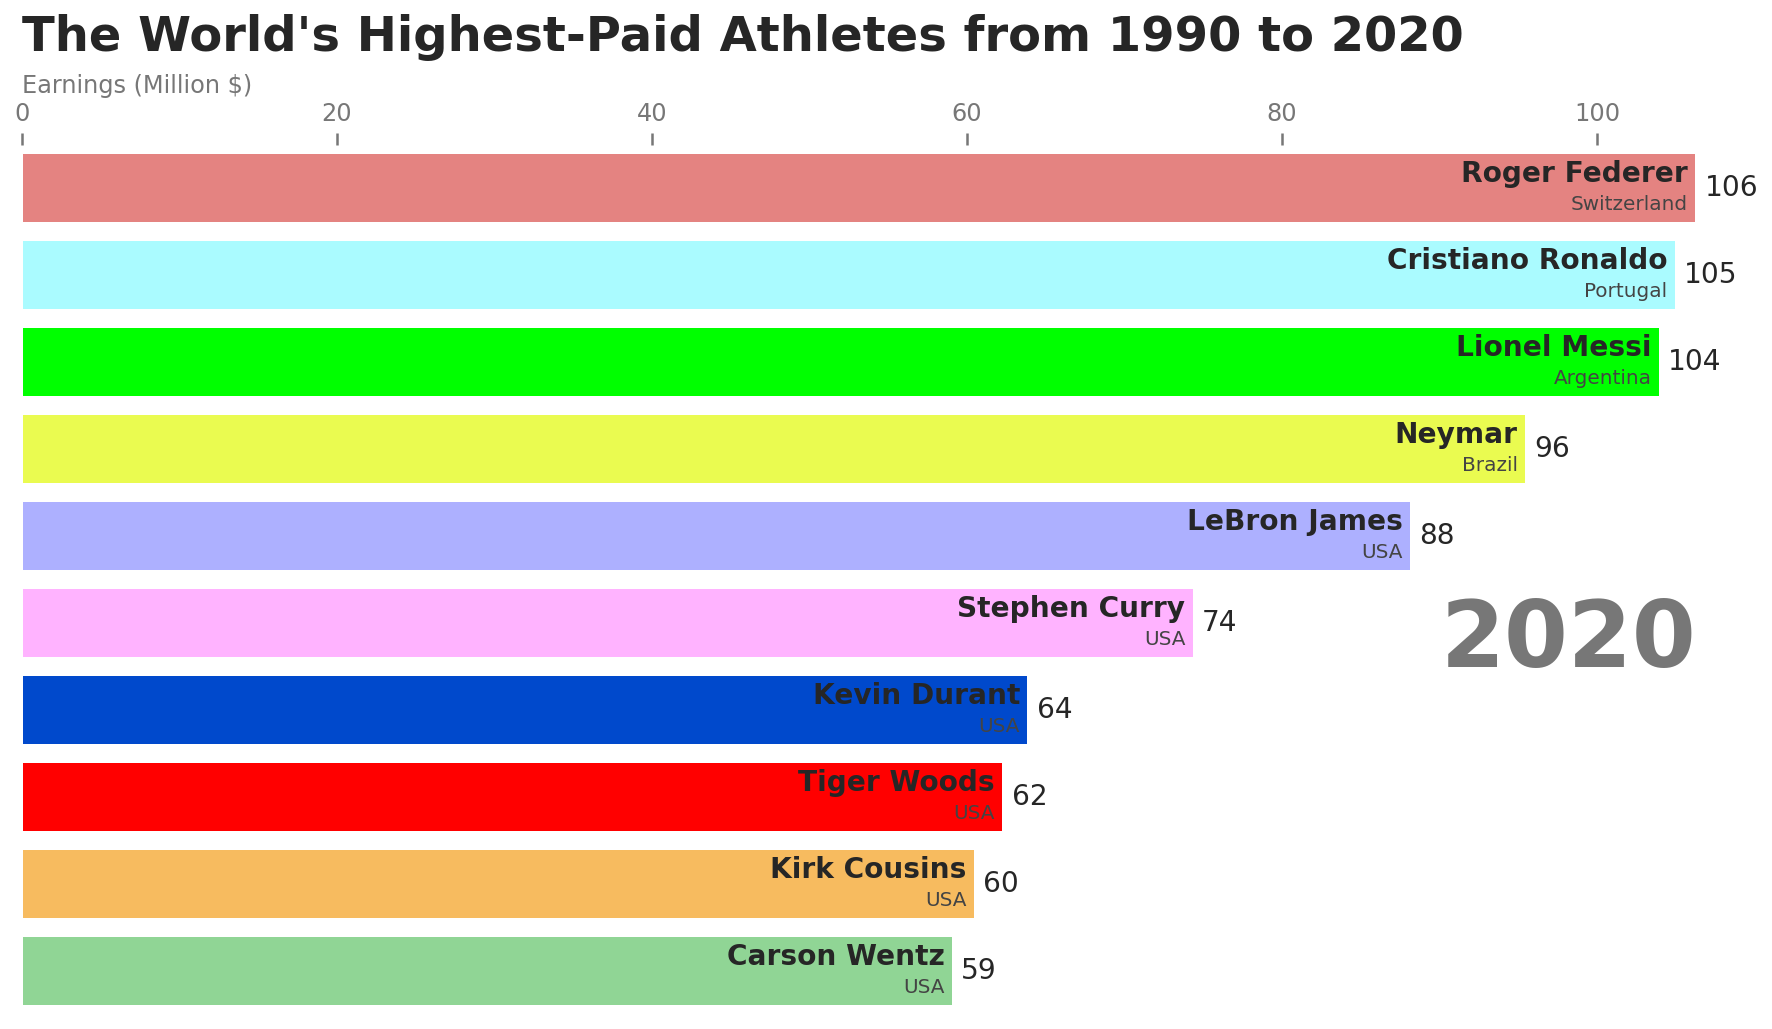

In [34]:
data = df[['Name','Nationality','Year','earnings ($ million)']]
data.rename(columns={'earnings ($ million)':'value'},inplace=True)

group_lk = df.set_index('Name')['Nationality'].to_dict()

# colors = {
#     "Carson Wentz": "#adb0ff",
#     "Kirk Cousins": "#ffb3ff",
#     "Tiger Woods":"#90d595",
#     "Kevin Durant": "#e48381",
#     "Stephen Curry": "#aafbff",
#     "LeBron James": "#f7bb5f",
#     "Neymar": "#eafb50",
#     "Lionel Messi": "#ff0000",
#     "Cristiano Ronaldo": "#00ff00",
#     "Roger Federer": "#0000ff"
# }
colors = {"#adb0ff", "#ffb3ff", "#90d595", "#e48381", "#aafbff", "#f7bb5f", "#eafb50", "#ff0000", "#00ff00", "#0049cc"}


fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(current_year):
    dff = data[data['Year'].eq(current_year)].sort_values(by='value', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['Name'], dff['value'], color=colors)  # colors[dff['Name']]
    dx = dff['value'].max() / 200
    for i, (value, name) in enumerate(zip(dff['value'], dff['Name'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    ax.text(1, 0.4, current_year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Earnings (Million $)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, "The World's Highest-Paid Athletes from 1990 to 2020",
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='white')
    plt.box(False)
    
draw_barchart(2020)

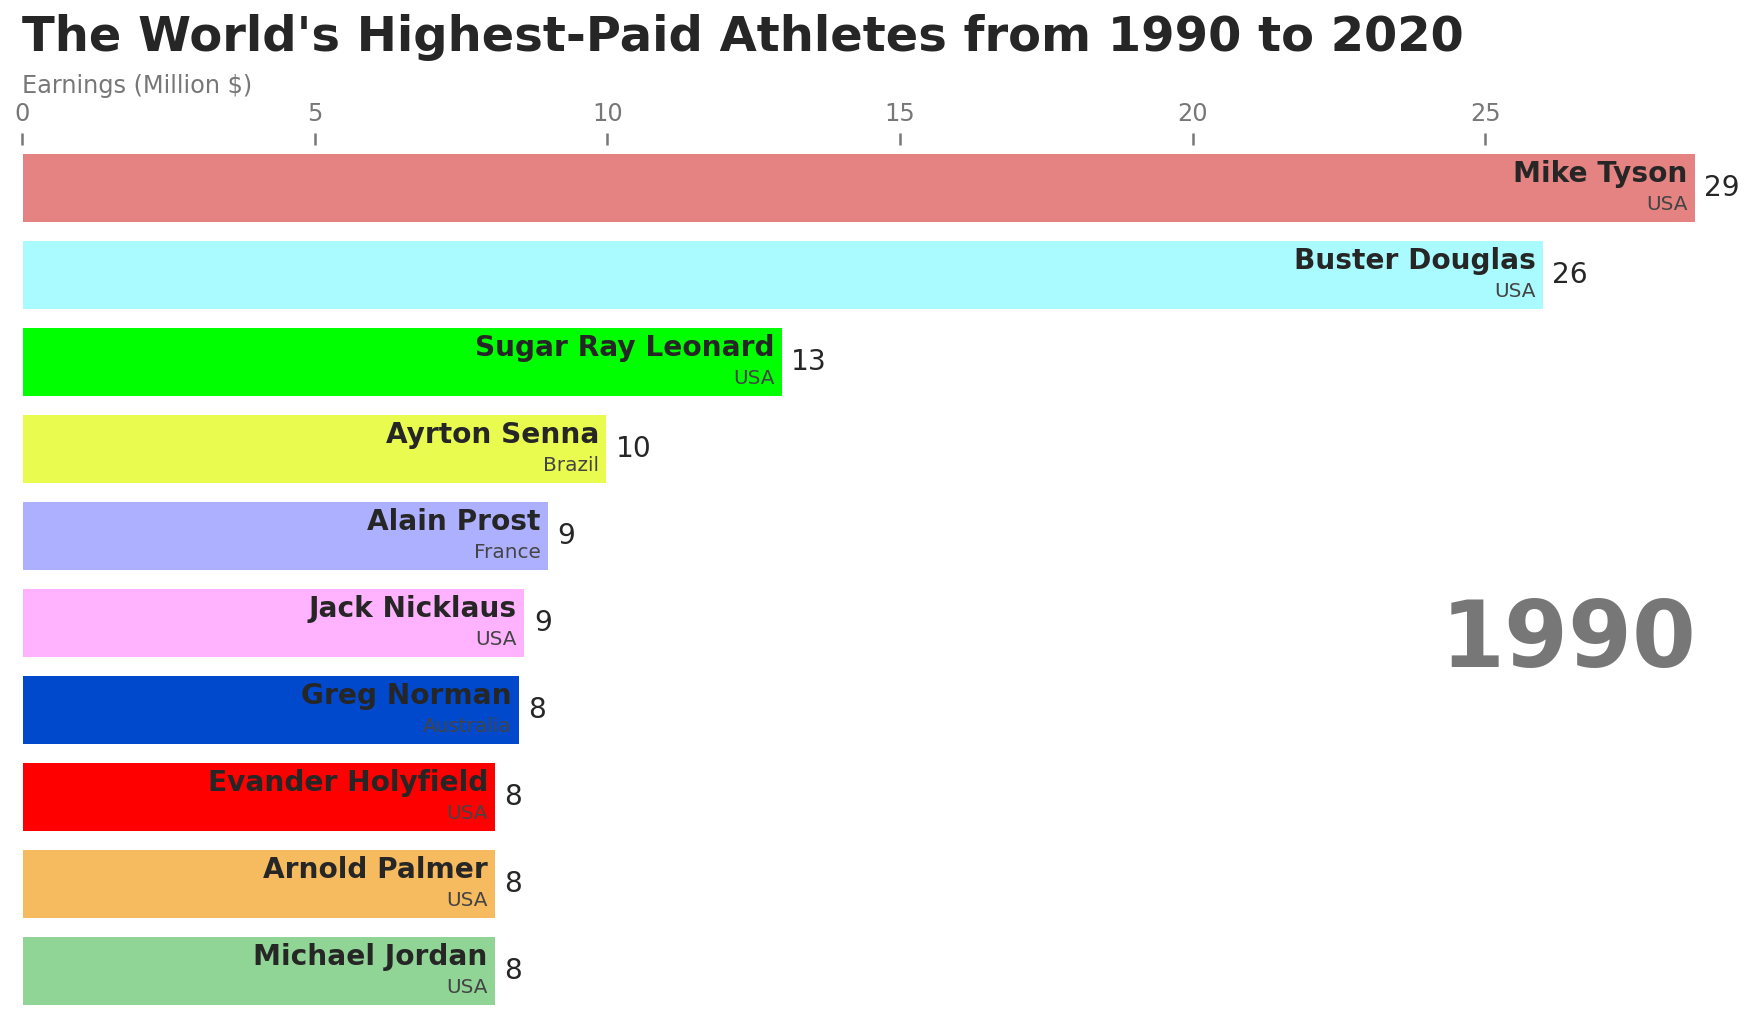

In [36]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1990, 2020), interval=300)
HTML(animator.to_jshtml())
animator.save("racing_bar_chart.gif", writer='imagemagick')